# Lab 11: Standing Waves

Importing the python packages and also importing our data. This time, just like the previous couple of lab files, we can directly import them manually since there isn't a lot of data.

In [227]:
#Import statments

import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

In [228]:
frequencies = np.array([9.95, 20.00, 29.88, 40.08, 49.94, 60.05, 70.09])
harmonics = np.array([1, 2, 3, 4, 5, 6, 7])

From the theoretical model, we have the relationship: 

$$ n = 2fL\sqrt{\frac{\mu}{T}}$$

This means that since we are holding length and tension to be constant (since we're hanging a constant mass), then we should expect the harmonic number $n$ to depend linearlly against the frequency. Performing a linear fit: 

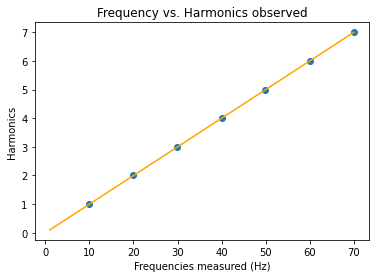

slope: 0.09996119075653101 ± 6.488302002611976e-05


In [229]:
def linear (x, m):
    return m*x

opt, cov = opt.curve_fit(linear, frequencies, harmonics)
slope = opt
dslope = np.sqrt(np.diag(cov))

x_values = np.linspace(1, 70, 10)
y_values = slope*x_values

plt.plot(x_values, y_values, c = 'orange')
plt.scatter(frequencies, harmonics)
plt.title("Frequency vs. Harmonics observed")
plt.ylabel("Harmonics")
plt.xlabel("Frequencies measured (Hz)")
plt.show()

print(f"slope: {slope[0]} \u00b1 {dslope[0]}")


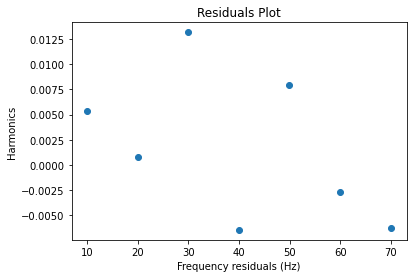

chi^2: 21632.449632364696
reduced chi^2: 3090.349947480671


In [230]:
residuals = 0
res = []
for i in range(len(harmonics)):
    residuals += (harmonics[i]- y_values[i])**2/(0.03**2)
    res.append([harmonics[i] - linear(frequencies[i], slope)])


plt.scatter(frequencies, res)
plt.title("Residuals Plot")
plt.ylabel("Harmonics")
plt.xlabel("Frequency residuals (Hz)")
plt.show()

print(f"chi^2: {residuals}")
print(f"reduced chi^2: {residuals/7}")

Calculating the linear mass density using our obtained values:

In [231]:
mu_exp = (slope**2 * 0.150 * 9.8)/(4*(0.945**2))
dmu_exp = slope/(2*0.945**2)*np.sqrt(((slope**2 * 0.0981**2)/4) + (0.150 * 9.8)**2*(dslope**2) + ((slope**2)*(0.150 * 9.8)**2 * 0.002**2)/(0.945**2))

theoretical = 0.013/3.93
dtheoretical = 1/3.93 *np.sqrt(1 + 0.013**2/3.93**2 * 0.03**2)
print(f"Theoretical mu: {theoretical} \u00b1 {dtheoretical}")
print(f"Experimental mu: {mu_exp[0]} kg/m \u00b1 {dmu_exp[0]}")

Theoretical mu: 0.003307888040712468 ± 0.2544529274615663
Experimental mu: 0.00411203278084921 kg/m ± 0.0002750184957937947
